# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how = 'outer', on = "Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_num = merge_df["Mouse ID"].nunique()
mice_num

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dup_ids = duplicates["Mouse ID"].unique()
dup_array = np.array(dup_ids, dtype=object)
dup_array

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = merge_df.loc[merge_df["Mouse ID"] == "g989"]
dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_df[merge_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_num2 = clean_df["Mouse ID"].nunique()
mice_num2


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_df = clean_df.groupby(["Drug Regimen"])


mean_vol = reg_df["Tumor Volume (mm3)"].mean()
median_vol = reg_df["Tumor Volume (mm3)"].median()
vol_var = reg_df["Tumor Volume (mm3)"].var()
vol_dev = reg_df["Tumor Volume (mm3)"].std()
vol_err = reg_df["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Tumor Volume Mean': mean_vol,
    'Tumor Volume Median': median_vol,
    'Tumor Volume Variance': vol_var,
    'Tumor Volume Std. Dev': vol_dev,
    'Tumor Volume Std. Err': vol_err
})

summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = reg_df["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    var='var',
    std_dev='std',
    err='sem'
)

summary_df2

,mean,median,var,std_dev,err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

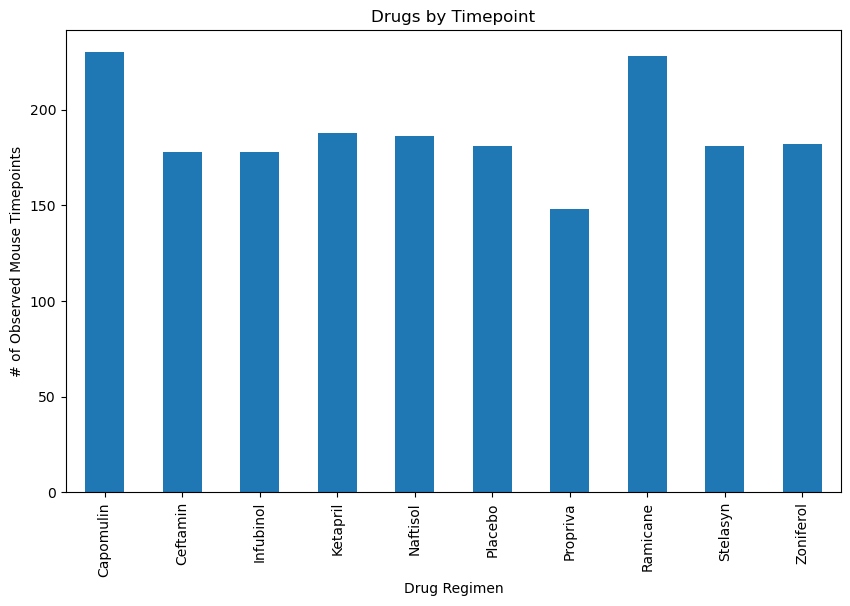

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg = reg_df["Drug Regimen"].size()
plt.figure(figsize=(10, 6))
drug_reg.plot(kind='bar')

plt.title("Drugs by Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

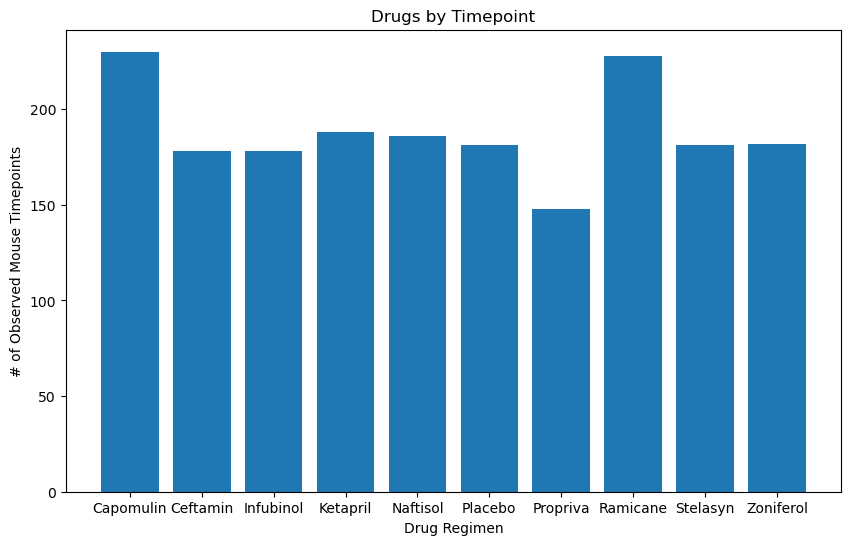

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg = reg_df["Drug Regimen"].size()
plt.figure(figsize=(10, 6))
plt.bar(drug_reg.index, drug_reg.values, align='center')

plt.title("Drugs by Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

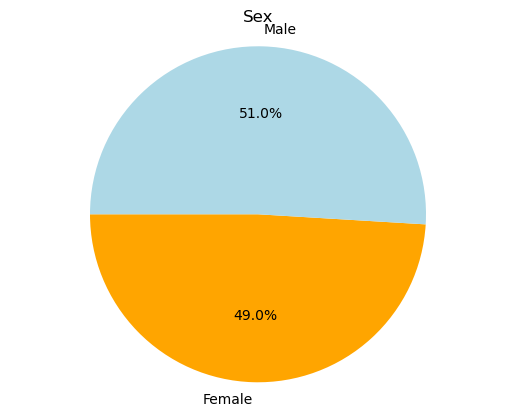

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Panda
fm_df = clean_df.groupby(["Sex"]).size()

colors = ["orange", "lightblue"]
sex = ["Female", "Male"]

fm_df.plot(kind='pie', autopct='%1.1f%%', labels=sex, colors=colors, startangle=180)

plt.title("Sex")
plt.axis("equal")
plt.show()

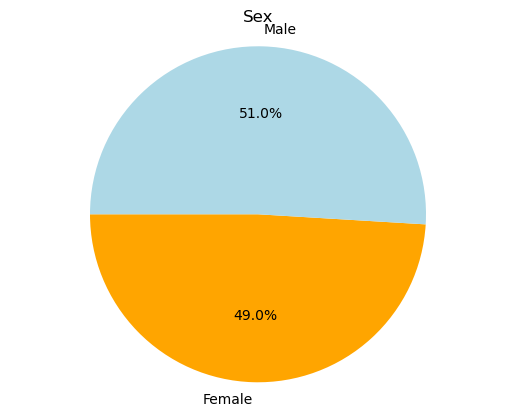

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fm_df = clean_df.groupby(["Sex"]).size()

colors = ["orange", "lightblue"]
sex = ["Female", "Male"]

plt.pie(fm_df, labels=sex, colors=colors,
        autopct="%1.1f%%", startangle=180)

plt.title("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_df = clean_df.groupby(["Mouse ID"])
idx = group_df['Timepoint'].idxmax()
greatest = clean_df.loc[idx]
last = greatest[greatest['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
last.reset_index(drop=True, inplace=True)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
potential_outliers_dict = {}

for treatment in treatments:
    treatment_data = last[last['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    tumor_vol_data.append(treatment_data)
    
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lowerq = treatment_data.quantile(0.25)
    upperq = treatment_data.quantile(0.75)
    iqr = upperq - lowerq
   
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    potential_outliers_dict[treatment] = outliers
   

for treatment, outliers in potential_outliers_dict.items():
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


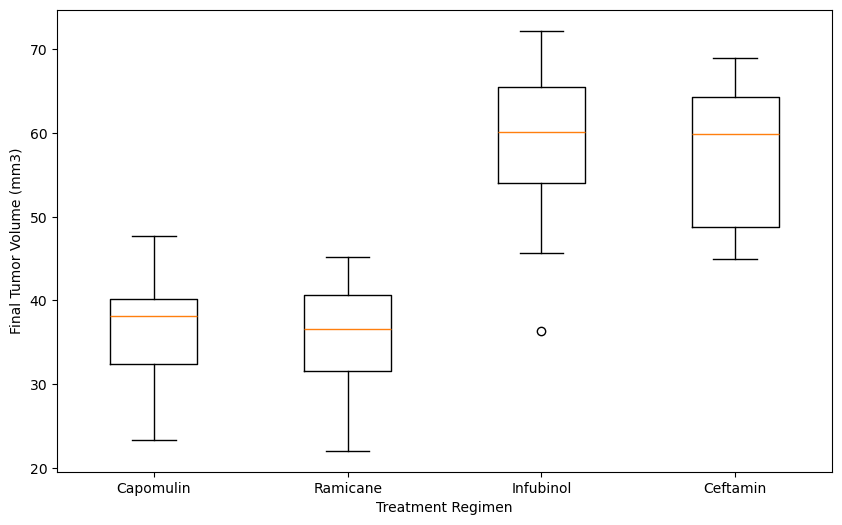

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

plt.boxplot(tumor_vol_data, labels=treatments)

plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

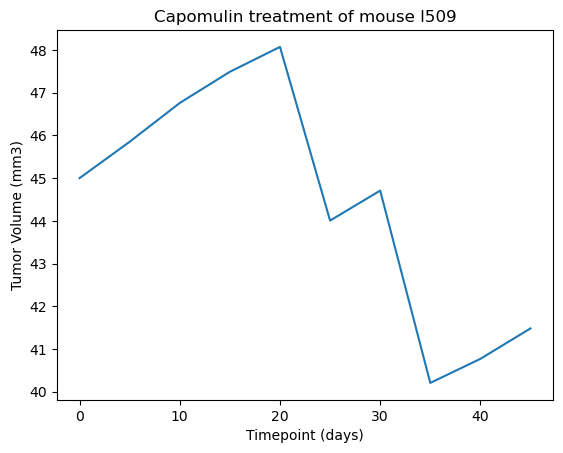

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#capo = clean_df.loc[last["Drug Regimen"] == "Capomulin"]
data = clean_df.loc[clean_df["Mouse ID"] == "l509"]

timepoint = data.iloc[:,1]
vol = data.iloc[:,2]

plt.plot(timepoint,vol)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

plt.show()

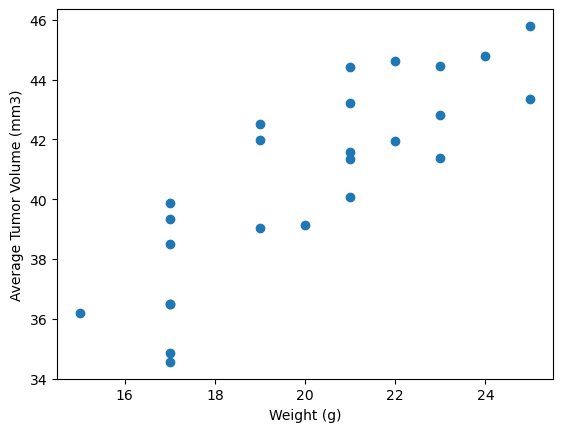

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

cap_grouped = capo.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
}).reset_index()

weight = cap_grouped["Weight (g)"]
avg = cap_grouped["Tumor Volume (mm3)"]

plt.scatter(weight, avg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


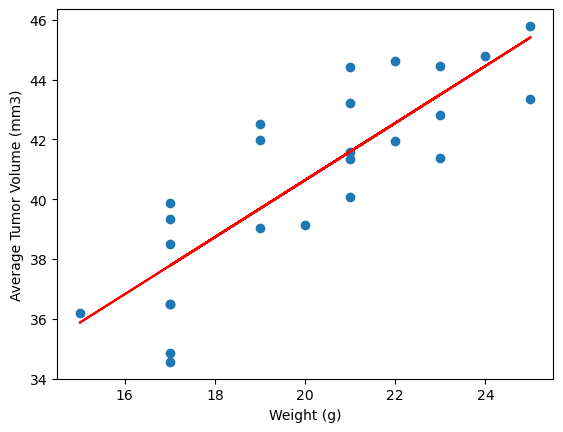

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

cap_grouped = capo.groupby("Mouse ID").agg({
    "Weight (g)": "mean",
    "Tumor Volume (mm3)": "mean"
}).reset_index()

weight = cap_grouped["Weight (g)"]
avg = cap_grouped["Tumor Volume (mm3)"]

slope, intercept = np.polyfit(weight, avg, 1)
plt.plot(weight, slope * weight + intercept, color='red')

plt.scatter(weight, avg)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(weight, avg)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()